In [32]:
%reset -f

In [33]:
# 1. Call libraries
import numpy as np

# 1.1 Classes for creating models
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

# 1.2 Class for accessing pre-built models
from keras import applications

# 1.3 Class for generating infinite images
from keras.preprocessing.image import ImageDataGenerator

# 1.4 Miscelleneous
import matplotlib.pyplot as plt
import time, os


In [34]:
train_data_dir      =  '/home/ashok/Images/kaggle_invasive/data'
validation_data_dir =  '/home/ashok/Images/kaggle_invasive/valid'

In [35]:
img_width, img_height = 150, 150
#nb_train_samples, nb_validation_samples = 2000, 800

In [36]:
num_classes = 2
train_samples = 2000
validation_samples = 295
batch_size_train = 16
batch_size_valid = 5 
#image_height = 224        # ResNet input image shape
#image_width = 224
#esnet_weights_path = '/home/ashok/.keras/models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


traindata_filename = '/home/ashok/.keras/models/BottleNeck_Features_InvNonInv_traindata.npy'

# 2.6 File to which transformed bottleneck features for validation data wil be stored
val_filename = '/home/ashok/.keras/models/BottleNeck_Features_InvNonInv_validationdata.npy'

In [37]:
train_samples   //batch_size_train, validation_samples//batch_size_valid

(125, 59)

# Instantiating a small ConvNet 

In [38]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [40]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc']
             )

# Data Preprocessing from ImageGenerators

In [41]:
datagen_train = ImageDataGenerator(rescale=1. / 255)
datagen_val = ImageDataGenerator(rescale=1. / 255)

In [42]:
generator_tr = datagen_train.flow_from_directory(
                                                  directory = train_data_dir,             
                                                  target_size=(150,150),    
                                                  batch_size=train_samples//batch_size_train,                 
                                                  class_mode='binary' 
                                                )

                                                    

Found 2000 images belonging to 2 classes.


In [43]:
generator_val = datagen_val.flow_from_directory(
                                                  directory = validation_data_dir,             
                                                  target_size=(150,150),    
                                                  batch_size=validation_samples//batch_size_valid,                 
                                                  class_mode='binary' 
                                                )

Found 295 images belonging to 2 classes.


In [44]:
for data_batch, labels_batch in generator_tr:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
for data_batch, labels_batch in generator_val:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (125, 150, 150, 3)
labels batch shape: (125,)
data batch shape: (59, 150, 150, 3)
labels batch shape: (59,)


# Fitting the model using a batch generator

In [45]:
history = model.fit_generator(
                                generator_tr,
                                steps_per_epoch=125,
                                epochs=10,
                                validation_data=generator_val,
                                validation_steps=50
                             )

Epoch 1/10
125/125 [==============================] - 5923s 47s/step - loss: 3.4466 - acc: 0.5940 - val_loss: 9.9978 - val_acc: 0.3729
Epoch 2/10
125/125 [==============================] - 30005s 240s/step - loss: 9.9485 - acc: 0.3748 - val_loss: 9.9978 - val_acc: 0.3729
Epoch 3/10
125/125 [==============================] - 3329s 27s/step - loss: 10.0511 - acc: 0.3695 - val_loss: 9.9978 - val_acc: 0.3729
Epoch 4/10
 11/125 [=>............................] - ETA: 44:45 - loss: 10.2147 - acc: 0.3593

KeyboardInterrupt: 

In [ ]:
val_acc = history.history ['val_acc']
tr_acc=history.history ['acc']
epochs = range(1, len(val_acc) +1)
plt.plot(epochs,val_acc, 'b', label = "Validation accu")
plt.plot(epochs, tr_acc, 'r', label = "Training accu")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.show()

In [ ]:
val_loss = history.history ['val_loss']
tr_loss=history.history ['loss']
epochs = range(1, len(val_acc) +1)
plt.plot(epochs,val_loss, 'b', label = "Validation loss")
plt.plot(epochs, tr_loss, 'r', label = "Training loss")
plt.title("Training and validation loss")
plt.legend()
plt.figure()
plt.show()

# Data augmentation (Only Normalization) and Instanstiating an image data generator for Train and Validation: 

In [7]:
datagen_train = ImageDataGenerator(rescale=1. / 255)

In [8]:
generator_tr = datagen_train.flow_from_directory(
              directory = train_data_dir,             # Path to target train directory.
              target_size=(img_width, img_height),    # Dimensions to which all images will be resized.
              batch_size=batch_size,                  # At a time so many images will be output
              class_mode=None,                        # Return NO labels along with image data
              shuffle=False                           # Default shuffle = True
                )

Found 2000 images belonging to 2 classes.


In [9]:
datagen_val = ImageDataGenerator(rescale=1. / 255)

In [10]:
generator_val = datagen_val.flow_from_directory(
              directory = validation_data_dir,             # Path to target train directory.
              target_size=(img_width, img_height),    # Dimensions to which all images will be resized.
              batch_size=batch_size,                  # At a time so many images will be output
              class_mode=None,                        # Return NO labels along with image data
              shuffle=False                           # Default shuffle = True
                )

Found 295 images belonging to 2 classes.


# Build VGG16 network model with 'imagenet' weights

In [35]:
model = applications.VGG16(
                            include_top=False,
                            weights='imagenet',
                            input_shape=(img_width, img_height,3)
                         )

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 75, 75, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0         
__________

# Feed images through VGG16 model in batches (steps)and make 'predictions' until the last layer block5_pool and create a bottleneck to feed to the classifier subsequently.

In [13]:
batch_size

5

In [14]:
start = time.time()
BottleNeck_Features_InvNonInv_traindata = model.predict_generator(
                                                    generator = generator_tr,
                                                    steps = 2000 // batch_size,
                                                    verbose = 1
                                                    )
end = time.time()
print("Time taken: ",(end - start)/60, "minutes")

400/400 [==============================] - 469s 1s/step
Time taken:  7.815301537513733 minutes


In [15]:
start = time.time()
BottleNeck_Features_InvNonInv_validationdata = model.predict_generator(
                                                         generator = generator_val,
                                                         steps = 295 // batch_size,
                                                         verbose = 1
                                                         )

end = time.time()
print("Time taken: ",(end - start)/60, "minutes")

59/59 [==============================] - 75s 1s/step
Time taken:  1.242406690120697 minutes


In [16]:
batch_size

5

# Saving features #

In [17]:
# Save the train features
#First delete the file to whcih we will save

if os.path.exists(traindata_filename):
    os.system('rm ' + traindata_filename)

# 5.2 Next save the train-features
np.save(open(traindata_filename, 'wb'), BottleNeck_Features_InvNonInv_traindata)


# 5.3 Save validation features from model
if os.path.exists(val_filename):
    os.system('rm ' + val_filename)

np.save(open(val_filename, 'wb'), BottleNeck_Features_InvNonInv_validationdata)

# Part II: Load saved abstract features and proceed with Modeling and Prediction

In [18]:
%reset -f
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
import time, os
import matplotlib.pyplot as plt

In [19]:
img_width, img_height = 75,75  
nb_train_samples = 2000
nb_validation_samples = 295
epochs = 30
batch_size = 50
# Bottleneck features for train data
traindata_filename = '/home/ashok/.keras/models/BottleNeck_Features_InvNonInv_traindata.npy'
# Validation-bottleneck features filename
val_filename = '/home/ashok/.keras/models/BottleNeck_Features_InvNonInv_validationdata.npy'


In [20]:
model_weights_path = '/home/ashok/.keras/models/bottleneck_FC_VGG16_model.h5'

Load Traindata Features & Validation Data Features

In [21]:
train_data_features = np.load(open(traindata_filename,'rb'))

In [22]:
train_data_features.shape

(2000, 2, 2, 512)

In [23]:
val_data_features = np.load(open(val_filename,'rb'))

In [24]:
val_data_features.shape

(295, 2, 2, 512)

In [25]:
train_labels = np.array([0] * 1263 + [1] * 737) 

In [26]:
validation_labels = np.array([0] * 185 + [1] * 110)

In [27]:
len(validation_labels), len(train_labels)

(295, 2000)

# Plan model with FC layers only and use transformed features as input to FC model instead of actual train data

In [28]:
model1 = Sequential()
model1.add(Flatten(input_shape=train_data_features.shape[1:]))  
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 524,801
Trainable params: 524,801
Non-trainable params: 0
_________________________________________________________________


In [29]:
model1.compile(
              optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

# Fit model and make predictions on validation dataset

In [30]:
start = time.time()
history = model1.fit(train_data_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(val_data_features, validation_labels),
                    verbose =1
                   )
end = time.time()
print("Time taken: ",(end - start)/60, "minutes")

Train on 2000 samples, validate on 295 samples
Epoch 1/30
2000/2000 [==============================] - 1s 395us/step - loss: 0.6749 - acc: 0.6880 - val_loss: 0.4356 - val_acc: 0.7695
Epoch 2/30
2000/2000 [==============================] - 1s 255us/step - loss: 0.4324 - acc: 0.7885 - val_loss: 0.4438 - val_acc: 0.7661
Epoch 3/30
2000/2000 [==============================] - 0s 249us/step - loss: 0.4136 - acc: 0.8015 - val_loss: 0.4073 - val_acc: 0.7932
Epoch 4/30
2000/2000 [==============================] - 0s 236us/step - loss: 0.3944 - acc: 0.8080 - val_loss: 0.4700 - val_acc: 0.7525
Epoch 5/30
2000/2000 [==============================] - 0s 247us/step - loss: 0.3897 - acc: 0.8020 - val_loss: 0.3903 - val_acc: 0.8000
Epoch 6/30
2000/2000 [==============================] - 1s 290us/step - loss: 0.3621 - acc: 0.8300 - val_loss: 0.3966 - val_acc: 0.7864
Epoch 7/30
2000/2000 [==============================] - 1s 257us/step - loss: 0.3466 - acc: 0.8325 - val_loss: 0.6185 - val_acc: 0.7458
E

In [31]:
model1.save_weights(model_weights_path )

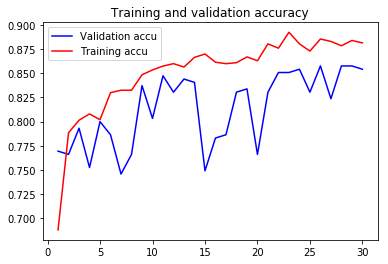

In [32]:
val_acc = history.history ['val_acc']
tr_acc=history.history ['acc']
epochs = range(1, len(val_acc) +1)
plt.plot(epochs,val_acc, 'b', label = "Validation accu")
plt.plot(epochs, tr_acc, 'r', label = "Training accu")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.show()



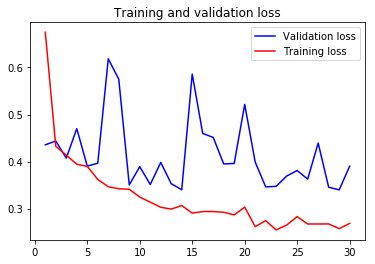

In [33]:
val_loss = history.history ['val_loss']
tr_loss=history.history ['loss']
epochs = range(1, len(val_acc) +1)
plt.plot(epochs,val_loss, 'b', label = "Validation loss")
plt.plot(epochs, tr_loss, 'r', label = "Training loss")
plt.title("Training and validation loss")
plt.legend()
plt.figure()
plt.show()

# We can see there are lot of variations in both Validation Accuracy and Loss. This is because of overfitting. Let us try to do Data Augmentation to see if we can reduce overfitting. 

# FEATURE EXTRACTION WITH DATA AUGMENTATION and Instanstiating an image data generator for Train and Validation with Pre-trained ConvNet:

In [37]:
from keras import models
from keras import layers
model2 = models.Sequential()
model2.add(model)                 ### The first base model that we created with 2x2x512 feature map
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 15,239,489
Trainable params: 15,239,489
Non-trainable params: 0
_________________________________________________________________


Before you compile and train the model, it’s very important to freeze the convolutional base. Freezing a layer or set of layers means preventing their weights from being updated during training. If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. Because the Dense layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned.
# In Keras, you freeze a network by setting its trainable attribute to False.

In [39]:
model.trainable=False

# Training the model end to end with a frozen convolutional base

In [46]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                  )

In [47]:
generator_tr1 = train_datagen.flow_from_directory(
              directory = train_data_dir,             # Path to target train directory.
              target_size=(img_width, img_height),    # Dimensions to which all images will be resized.
              batch_size=batch_size,                  # At a time so many images will be output
              class_mode='binary',                        # Return NO labels along with image data
              shuffle=False                           # Default shuffle = True
                )


Found 2000 images belonging to 2 classes.


In [48]:
val_datagen = ImageDataGenerator(rescale=1. / 255)

In [49]:
generator_val1 = val_datagen.flow_from_directory(
              directory = validation_data_dir,             # Path to target train directory.
              target_size=(img_width, img_height),    # Dimensions to which all images will be resized.
              batch_size=batch_size,                  # At a time so many images will be output
              class_mode='binary',                        # Return NO labels along with image data
              shuffle=False                           # Default shuffle = True
                )

Found 295 images belonging to 2 classes.


In [50]:
model2.compile(
              optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [51]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 15,239,489
Trainable params: 524,801
Non-trainable params: 14,714,688
_________________________________________________________________


# Fit model and make predictions on validation dataset

In [52]:
start = time.time()
history = model2.fit_generator(generator_tr1,
                               epochs = 1,
                               validation_data=generator_val1,
                               steps_per_epoch=train_samples//batch_size,
                               validation_steps=1                                
                               )
end = time.time()
print("Time taken: ",(end - start)/60, "minutes")

Epoch 1/1
400/400 [==============================] - 491s 1s/step - loss: 0.6513 - acc: 0.6815 - val_loss: 0.1390 - val_acc: 1.0000
Time taken:  8.181382822990418 minutes


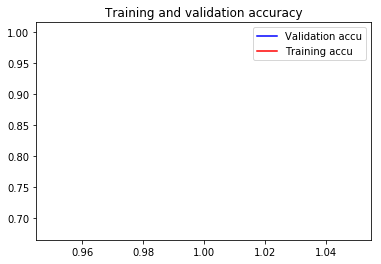

In [53]:
val_acc = history.history ['val_acc']
tr_acc=history.history ['acc']
epochs = range(1, len(val_acc) +1)
plt.plot(epochs,val_acc, 'b', label = "Validation accu")
plt.plot(epochs, tr_acc, 'r', label = "Training accu")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.show()

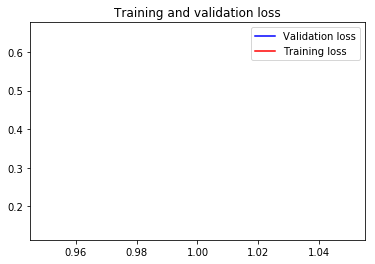

In [54]:
val_loss = history.history ['val_loss']
tr_loss=history.history ['loss']
epochs = range(1, len(val_acc) +1)
plt.plot(epochs,val_loss, 'b', label = "Validation loss")
plt.plot(epochs, tr_loss, 'r', label = "Training loss")
plt.title("Training and validation loss")
plt.legend()
plt.figure()
plt.show()

In [55]:
start = time.time()
history = model2.fit_generator(generator_tr1,
                               epochs = 10,
                               validation_data=generator_val1,
                               steps_per_epoch=50,
                               validation_steps=1                                
                               )
end = time.time()
print("Time taken: ",(end - start)/60, "minutes")

Epoch 1/10
50/50 [==============================] - 74s 1s/step - loss: 0.6303 - acc: 0.6880 - val_loss: 0.1990 - val_acc: 1.0000
Epoch 2/10
50/50 [==============================] - 68s 1s/step - loss: 0.4701 - acc: 0.7680 - val_loss: 1.1863 - val_acc: 0.2000
Epoch 3/10
50/50 [==============================] - 68s 1s/step - loss: 0.5591 - acc: 0.7760 - val_loss: 0.1156 - val_acc: 1.0000
Epoch 4/10
50/50 [==============================] - 70s 1s/step - loss: 0.5790 - acc: 0.7800 - val_loss: 0.9918 - val_acc: 0.4000
Epoch 5/10
50/50 [==============================] - 68s 1s/step - loss: 0.6693 - acc: 0.6800 - val_loss: 0.3697 - val_acc: 0.8000
Epoch 6/10
50/50 [==============================] - 67s 1s/step - loss: 0.6149 - acc: 0.6960 - val_loss: 0.8570 - val_acc: 0.4000
Epoch 7/10
50/50 [==============================] - 69s 1s/step - loss: 0.5140 - acc: 0.7960 - val_loss: 0.1562 - val_acc: 1.0000
Epoch 8/10
50/50 [==============================] - 68s 1s/step - loss: 0.5505 - acc: 0.75

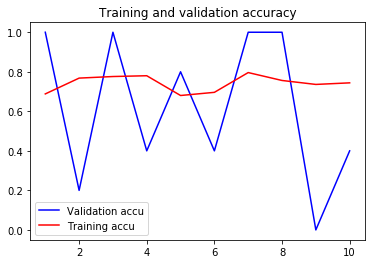

In [56]:
val_acc = history.history ['val_acc']
tr_acc=history.history ['acc']
epochs = range(1, len(val_acc) +1)
plt.plot(epochs,val_acc, 'b', label = "Validation accu")
plt.plot(epochs, tr_acc, 'r', label = "Training accu")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.show()

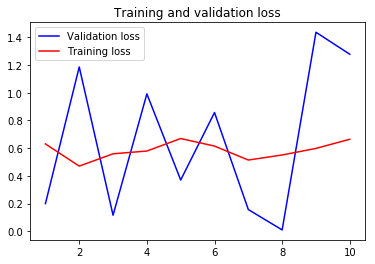

In [57]:
val_loss = history.history ['val_loss']
tr_loss=history.history ['loss']
epochs = range(1, len(val_acc) +1)
plt.plot(epochs,val_loss, 'b', label = "Validation loss")
plt.plot(epochs, tr_loss, 'r', label = "Training loss")
plt.title("Training and validation loss")
plt.legend()
plt.figure()
plt.show()

In [58]:
start = time.time()
history = model2.fit_generator(generator_tr1,
                               epochs = 30,
                               validation_data=generator_val1,
                               steps_per_epoch=50,
                               validation_steps=1                                
                               )
end = time.time()
print("Time taken: ",(end - start)/60, "minutes")

Epoch 1/30
50/50 [==============================] - 72s 1s/step - loss: 0.7060 - acc: 0.6960 - val_loss: 0.0398 - val_acc: 1.0000
Epoch 2/30
50/50 [==============================] - 70s 1s/step - loss: 0.6364 - acc: 0.6800 - val_loss: 1.3951 - val_acc: 0.2000
Epoch 3/30
50/50 [==============================] - 71s 1s/step - loss: 0.6025 - acc: 0.7480 - val_loss: 0.5531 - val_acc: 0.8000
Epoch 4/30
50/50 [==============================] - 74s 1s/step - loss: 0.6487 - acc: 0.7440 - val_loss: 0.7000 - val_acc: 0.8000
Epoch 5/30
50/50 [==============================] - 84s 2s/step - loss: 0.6788 - acc: 0.7240 - val_loss: 0.0247 - val_acc: 1.0000
Epoch 6/30
50/50 [==============================] - 71s 1s/step - loss: 0.6793 - acc: 0.7520 - val_loss: 1.3970 - val_acc: 0.4000
Epoch 7/30
50/50 [==============================] - 78s 2s/step - loss: 0.6931 - acc: 0.7600 - val_loss: 0.0241 - val_acc: 1.0000
Epoch 8/30
50/50 [==============================] - 71s 1s/step - loss: 0.8523 - acc: 0.70

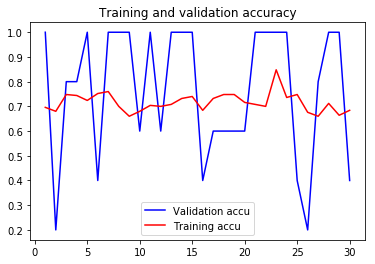

In [59]:
val_acc = history.history ['val_acc']
tr_acc=history.history ['acc']
epochs = range(1, len(val_acc) +1)
plt.plot(epochs,val_acc, 'b', label = "Validation accu")
plt.plot(epochs, tr_acc, 'r', label = "Training accu")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.show()

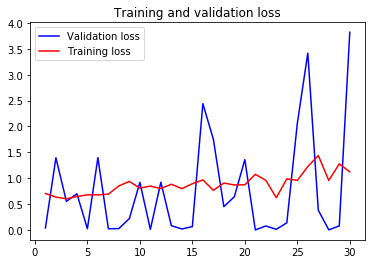

In [61]:
val_loss = history.history ['val_loss']
tr_loss=history.history ['loss']
epochs = range(1, len(val_acc) +1)
plt.plot(epochs,val_loss, 'b', label = "Validation loss")
plt.plot(epochs, tr_loss, 'r', label = "Training loss")
plt.title("Training and validation loss")
plt.legend()
plt.figure()
plt.show()